# 🏠 House Price Prediction using Linear Regression

**Objective:** 

To Implement and understand both Simple and Multiple Linear Regression using House Prediction Dataset.




### Import Libraries

In [171]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


### Load the Dataset
We'll load the housing dataset and inspect its structure.


In [172]:
df = pd.read_csv("housing.csv")
df.head()


,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


### Dataset Overview
Let's check for data types, null values, and descriptive statistics.


In [173]:
df.info()
df.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


,price,area,bedrooms,bathrooms,stories,parking
count,5.450000e+02,545.000000,545.000000,545.000000,545.000000,545.000000
mean,4.766729e+06,5150.541284,2.965138,1.286239,1.805505,0.693578
std,1.870440e+06,2170.141023,0.738064,0.502470,0.867492,0.861586
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,0.000000
25%,3.430000e+06,3600.000000,2.000000,1.000000,1.000000,0.000000
50%,4.340000e+06,4600.000000,3.000000,1.000000,2.000000,0.000000
75%,5.740000e+06,6360.000000,3.000000,2.000000,2.000000,1.000000
max,1.330000e+07,16200.000000,6.000000,4.000000,4.000000,3.000000


### Split Data into Train and Test Sets

We separate features and target, then split data into training and testing sets.


In [174]:
# Define features and target variable
X = df.drop(columns=['price'])
y = df['price']

# Split the dataset into training and test sets (80%-20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


### Data Preprocessing

We'll:
- Convert Yes/No categorical variables to binary (0/1)
- One-hot encode the 'furnishingstatus' column


In [175]:
# Convert binary categorical columns
binary_map = {'yes': 1, 'no': 0}
binary_cols = ['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea']

for col in binary_cols:
    df[col] = df[col].map(binary_map)

# One-hot encode furnishingstatus
df = pd.get_dummies(df, columns=['furnishingstatus'], drop_first=True)


### Simple Linear Regression
We start with a basic model using only the `area` feature to predict house prices.


In [176]:
X_simple = df[['area']]
y = df['price']

X_train_s, X_test_s, y_train_s, y_test_s = train_test_split(X_simple, y, test_size=0.2, random_state=42)

model_s = LinearRegression()
model_s.fit(X_train_s, y_train_s)
y_pred_s = model_s.predict(X_test_s)


### Evaluation: Simple Linear Regression
We evaluate the model using common regression metrics: MAE, MSE, and R².


In [177]:
print("MAE:", mean_absolute_error(y_test_s, y_pred_s))
print("MSE:", mean_squared_error(y_test_s, y_pred_s))
print("R² Score:", r2_score(y_test_s, y_pred_s))


MAE: 1474748.1337969352
MSE: 3675286604768.185
R² Score: 0.27287851871974644


### Plot: Regression Line (Area vs Price)


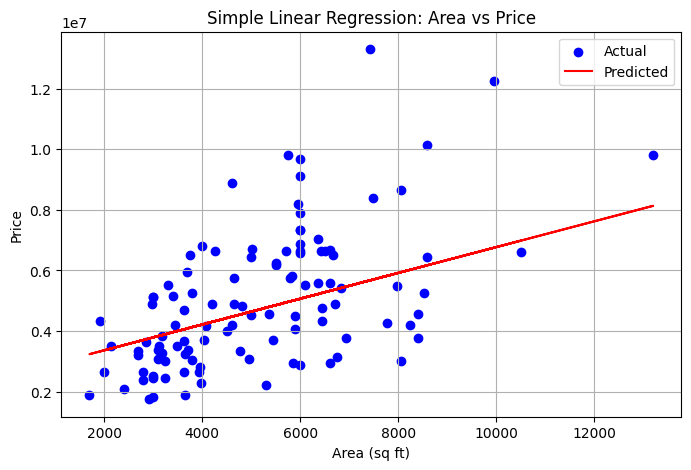

In [178]:
plt.figure(figsize=(8, 5))
plt.scatter(X_test_s, y_test_s, color='blue', label='Actual')
plt.plot(X_test_s, y_pred_s, color='red', label='Predicted')
plt.xlabel("Area (sq ft)")
plt.ylabel("Price")
plt.title("Simple Linear Regression: Area vs Price")
plt.legend()
plt.grid(True)
plt.show()


### Multiple Linear Regression
We'll now use all available features to train a more powerful regression model.


In [179]:
X_multi = df.drop(columns=['price'])
y_multi = df['price']

X_train_m, X_test_m, y_train_m, y_test_m = train_test_split(X_multi, y_multi, test_size=0.2, random_state=42)

model_m = LinearRegression()
model_m.fit(X_train_m, y_train_m)
y_pred_m = model_m.predict(X_test_m)


### Evaluation: Multiple Linear Regression
Let's see how well the model performs with all features included.


In [180]:
print("MAE:", mean_absolute_error(y_test_m, y_pred_m))
print("MSE:", mean_squared_error(y_test_m, y_pred_m))
print("R² Score:", r2_score(y_test_m, y_pred_m))


MAE: 970043.4039201641
MSE: 1754318687330.664
R² Score: 0.6529242642153184


### Interpretation of Coefficients
We analyze which features have the most influence on the predicted price.


In [181]:
coeff_df = pd.DataFrame(model_m.coef_, index=X_multi.columns, columns=['Coefficient'])
coeff_df.sort_values(by='Coefficient', ascending=False)


,Coefficient
bathrooms,1.094445e+06
airconditioning,7.914267e+05
hotwaterheating,6.846499e+05
prefarea,6.298906e+05
stories,4.074766e+05
basement,3.902512e+05
mainroad,3.679199e+05
guestroom,2.316100e+05
parking,2.248419e+05
bedrooms,7.677870e+04


### Correlation Heatmap
Let's visualize how features correlate with the target variable `price` and with each other.


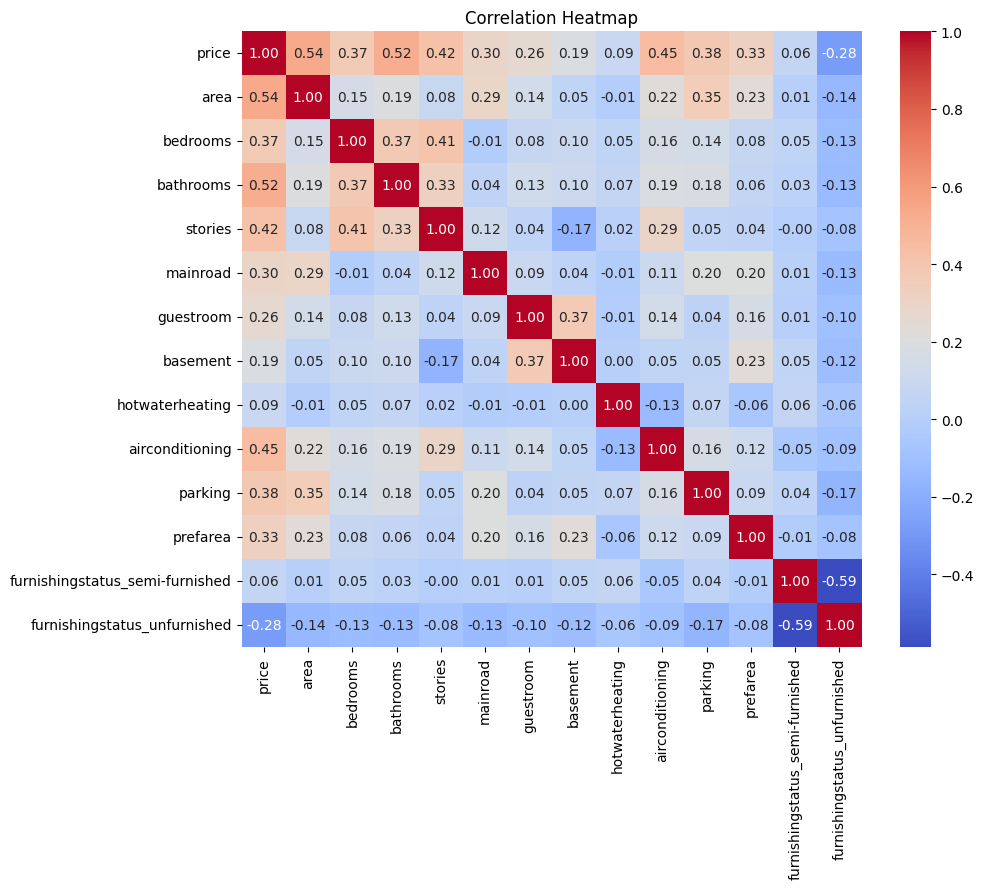

In [182]:
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()


### Visualizing Feature Importances
Based on the coefficients of our multiple regression model.


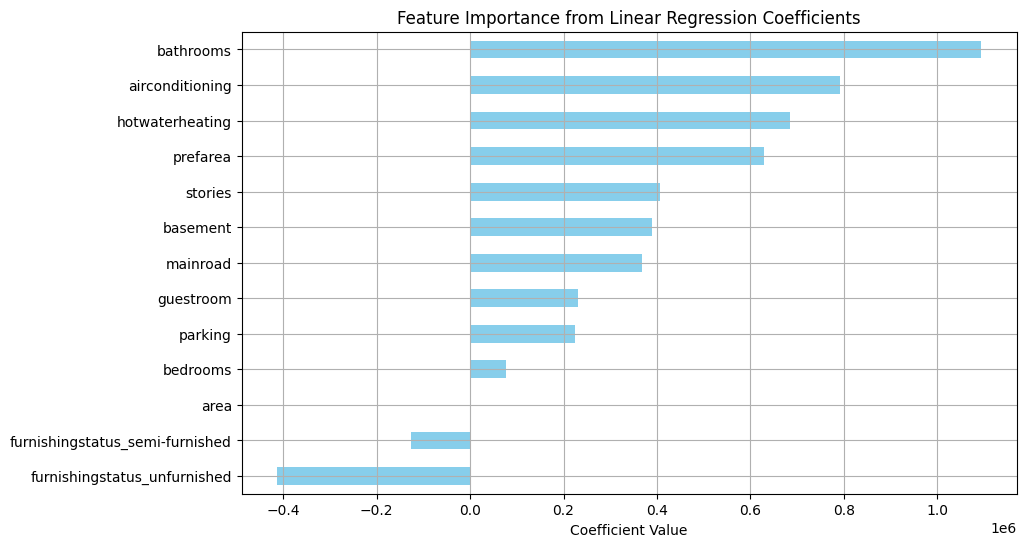

In [183]:
coeff_df = coeff_df.sort_values(by='Coefficient')
plt.figure(figsize=(10, 6))
coeff_df['Coefficient'].plot(kind='barh', color='skyblue')
plt.title("Feature Importance from Linear Regression Coefficients")
plt.xlabel("Coefficient Value")
plt.grid(True)
plt.show()


### Residual Plot
To verify if residuals are randomly distributed, which validates the linear regression assumption.


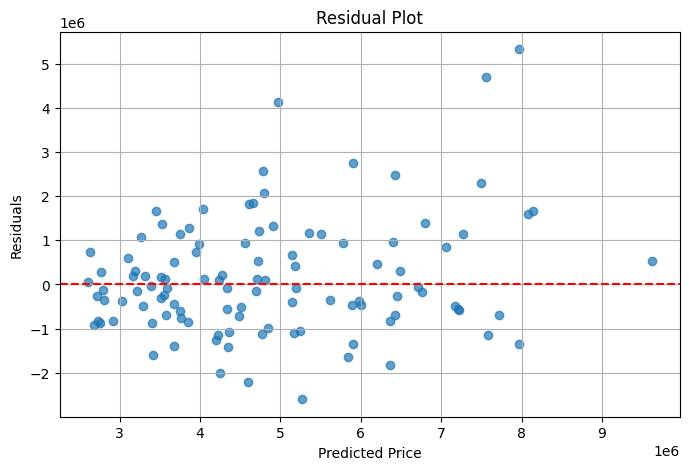

In [184]:
residuals = y_test_m - y_pred_m

plt.figure(figsize=(8, 5))
plt.scatter(y_pred_m, residuals, alpha=0.7)
plt.axhline(0, color='red', linestyle='--')
plt.title("Residual Plot")
plt.xlabel("Predicted Price")
plt.ylabel("Residuals")
plt.grid(True)
plt.show()


### Target Variable Distribution
We examine the distribution of `price` to check for skewness or outliers.


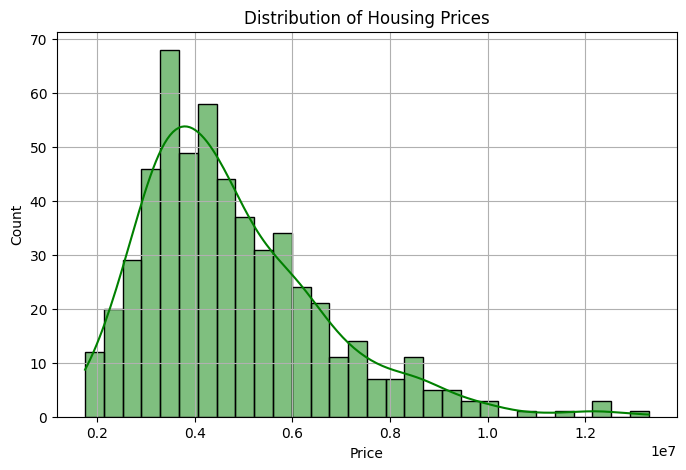

In [185]:
plt.figure(figsize=(8, 5))
sns.histplot(df['price'], bins=30, kde=True, color='green')
plt.title("Distribution of Housing Prices")
plt.xlabel("Price")
plt.ylabel("Count")
plt.grid(True)
plt.show()


### Conclusion

We built simple and multiple linear regression models to predict house prices. Including multiple features improved accuracy significantly. Encoding categorical data and checking multicollinearity ensured a robust model. This analysis highlights the effectiveness of linear regression in real estate price prediction and provides a base for more advanced modeling.
